In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        # Initialize weights to zero
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                # Forward Pass
                prediction = self.predict(xi)
                # Update rule
                update = self.lr * (target - prediction)
                self.weights += update * xi
                self.bias += update
                errors += int(update != 0.0)
            if errors == 0:
                print(f"Converged at epoch {epoch}")
                break

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

In [2]:
# Create linearly separable synthetic data (2 clusters)
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, n_features=2, cluster_std=1.2, random_state=42)

# Train the Perceptron
model = SingleLayerPerceptron(learning_rate=0.01, epochs=50)
model.fit(X, y)

# Prepare decision boundary line
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
# w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b) / w2
y_vals = -(model.weights[0] * x_vals + model.bias) / model.weights[1]



Converged at epoch 2


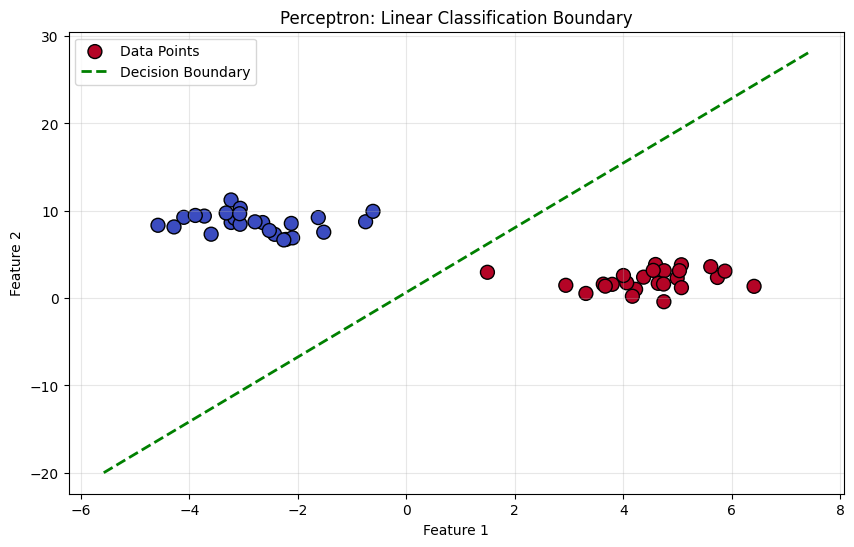

In [3]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100, label='Data Points')
plt.plot(x_vals, y_vals, 'g--', lw=2, label='Decision Boundary')
plt.title("Perceptron: Linear Classification Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()